# histplot

При рассмотрении примеров работы библиотеки seaborn, нам также понадобятся библиотеки matplotlib, pandas и numpy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'svg'

Данный код позволяет отображать графики в формате SVG (Scalable Vector Graphics), то есть в формате векторной графики. SVG основан на векторах, и это означает, что изображения состоят из линий и форм, а не пикселей. Это позволяет масштабировать изображения без потери качества.

Для создания гистограмм в *seaborn* используется функция `sns.histplot()`. Она разбивает данные на "бины" (корзины) и показывает, сколько значений попадает в каждую корзину.

Рассмотрим основные параметры функции `sns.histplot()`:
- `data`: данные, которые мы хотим визуализировать. Обычно это датафрейм или массив;
- `x, y`: название столбца данных, который мы хотим использовать для построения гистограммы (если data - это DataFrame);
- `hue`: используется для добавления цвета по категории данных;
- `multiple`: определяет, как будут отображаться подгруппы, указанные с помощью параметра hue;
- `bins`: количество корзин (по умолчанию seaborn сам выбирает подходящее количество);
- `binwidth`: определяет ширину каждого бина (корзины) в гистограмме;
- `binrange`: этот параметр позволяет задавать диапазон значений, которые будут охвачены гистограммой;
- `kde`: логический параметр, который определяет, строить ли поверх гистограммы плотность распределения (KDE - Kernel Density Estimate). По умолчанию принимает значение False;
- `stat`: определяет, какую статистику нужно вычислять и отображать на гистограмме;
- `cumulative`: используется для создания накопительной (кумулятивной) гистограммы (по умолчанию cumulative=False);
- `element`: определяет, как будет визуализироваться гистограмма. Например, 'bars' для столбиков или 'step' для ступенчатой линии;
- `color`: цвет гистограммы.
 
Рассматривать работу функции `sns.histplot()` будем на данных о трёх видах пингвинов (Adelie, Chinstrap и Gentoo), обитающих на трёх островах в Антарктике (Biscoe, Dream, Torgersen).

Загрузим датасет, сразу удалив пропущенные значения:

In [3]:
penguins = sns.load_dataset('penguins').dropna()

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [4]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


Датасет **penguins** содержит следующие столбцы:
- `'species'` - вид пингвина (Adelie, Chinstrap, Gentoo);
- `'island'` - остров, где были собраны данные (Biscoe, Dream, Torgersen);
- `'bill_length_mm'` - длина клюва в миллиметрах;
- `'bill_depth_mm'` - глубина клюва в миллиметрах;
- `'flipper_length_mm'` - длина ласт в миллиметрах;
- `'body_mass_g'` - масса тела в граммах;
- `'sex'` - пол пингвина (Male, Female).

Нарисуем первую гистограмму, предварительно установив стиль отображения - тёмный с координатной сеткой:

In [5]:
sns.set_style('darkgrid')

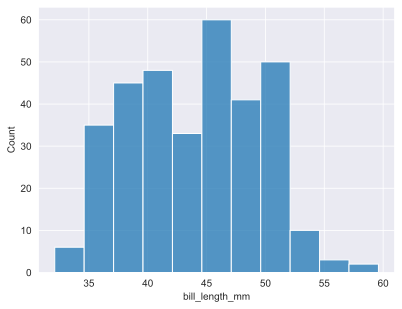

In [7]:
sns.histplot(penguins['bill_length_mm']);
# sns.histplot(x='bill_length_mm', data=penguins); -- можно ещё так

По оси абсцисс отложилась длина клюва в миллиметрах, а по оси ординат - количество наблюдений. 

Чтобы из вертикальной гистограммы сделать горизонтальную, нужно передать соответствующие значения параметру `y`:

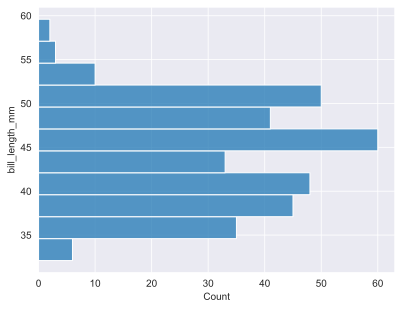

In [8]:
sns.histplot(y='bill_length_mm', data=penguins);

И гистограмма принимает горизонтальный вид.

**Параметр kde**

*Seaborn* предоставляет возможность добавить на гистограмму линию ядерной оценки плотности (KDE), передав одноимённому параметру значение `True`:

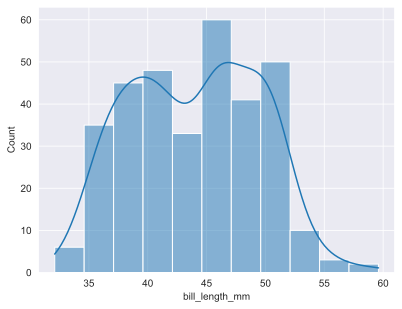

In [9]:
sns.histplot(x='bill_length_mm', data=penguins,
             kde=True);

Использование параметра `kde` может быть полезным в следующих ситуациях:
1. **Визуализация скрытых деталей**. Линия KDE может выявить особенности распределения данных, которые могут быть скрыты в гистограмме с крупными бинами.
2. **Сглаживание данных**. Линия KDE сглаживает данные, что помогает лучше понять общее распределение.
3. **Сравнение с гистограммой**. Одновременное отображение гистограммы и линии KDE позволяет сравнивать фактическое распределение данных с его сглаженной оценкой.

**Параметры color и alpha**

Параметр `color` позволяет менять цвет графика, а `alpha` позволяет управлять прозрачностью столбцов гистограммы.

Поменяем цвет диаграммы нзелёныйый:

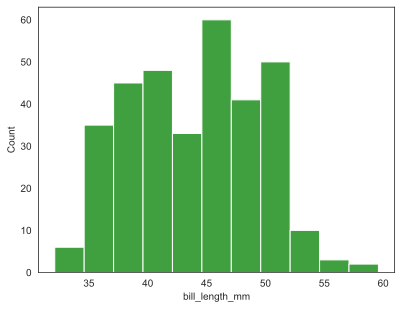

In [10]:
sns.set_style('white')

sns.histplot(x='bill_length_mm', data=penguins,
             color='green');

И сделаем столбцы полупрозрачными:

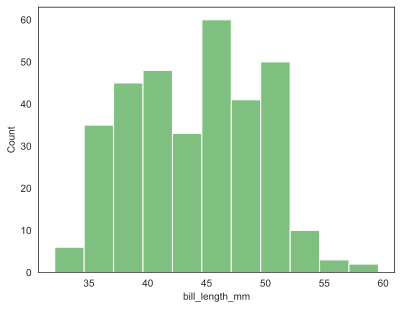

In [11]:
sns.histplot(x='bill_length_mm', data=penguins,
             color='green',
             alpha=0.5);

**Параметр bins**

Библиотека **seaborn** позволяет управлять количеством и расположением бинов (корзин) гистограммы. Делается это при помощи параметра `bins`.

Например, увеличим количество бинов до 20-ти:

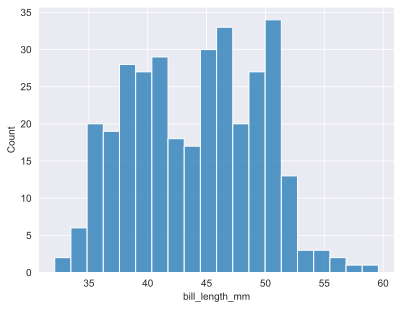

In [12]:
sns.set_style('darkgrid')

sns.histplot(x='bill_length_mm', data=penguins,
             bins=20);

Если параметру `bins` передать список с числами, то эти числа будут определять границы каждого бина. Например , `bins=[20, 30, 40, 50, 60, 70]` создаст бины с границами 20-30, 30-40, 40-50, 50-60, 60-70:

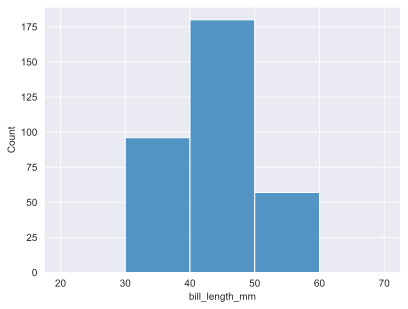

In [13]:
sns.histplot(x='bill_length_mm', data=penguins,
             bins=[20, 30, 40, 50, 60, 70]);

Выбор количества или размера бинов зависит от характеристик данных и целей визуализации.

**Параметр binwidth**

Параметр `binwidth` функции `sns.histplot()` определяет ширину каждого бина (корзины) в гистограмме. Этот параметр позволяет вам более точно контролировать, каким образом данные будут разделены на интервалы. Вместо того, чтобы указывать количество бинов, как это делается с параметром `bins`, `binwidth` позволяет задавать фиксированную ширину каждого интервала.

Когда вы задаете параметру `binwidth` определённое значение, *seaborn* автоматически рассчитывает количество бинов, необходимых для покрытия диапазона ваших данных, исходя из указанной ширины бинов. Это может быть полезно, если вы хотите, чтобы бины имели определенную ширину, независимо от общего количества данных.

Например, сделаем ширину каждого бина равную 5:

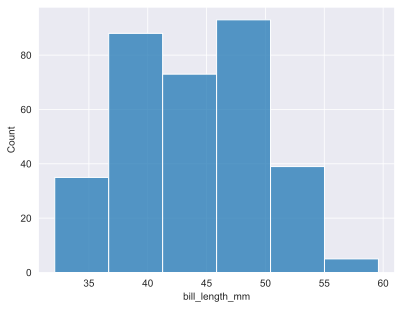

In [14]:
sns.histplot(x='bill_length_mm', data=penguins,
             binwidth=5);

Параметр `binwidth` предоставляет гибкость в настройке гистограммы, позволяя вам точно контролировать ширину бинов. Это может быть особенно полезно, когда необходимо визуализировать данные с определенными интервалами или сравнивать несколько наборов данных.

**Параметр binrange**

Параметр `binrange` позволяет задавать диапазон значений, которые будут охвачены гистограммой. Это полезно, когда вы хотите ограничить гистограмму определенным диапазоном данных или, например, избежать влияния выбросов на визуализацию.

Параметр `binrange` принимает кортеж из двух чисел: `(min, max)`. Эти числа определяют минимальное и максимальное значение диапазона данных, которые будут включены в гистограмму. Все значения данных, которые находятся за пределами этого диапазона, будут игнорироваться при построении гистограммы.

Например, построим гистограмму только для тех пингвинов, которые имеют длину клюва от 35 до 55 мм:

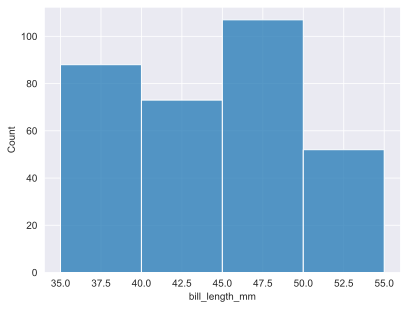

In [15]:
sns.histplot(x='bill_length_mm', data=penguins,
             binwidth=5,
             binrange=(35, 55));

Использование параметра `binrange` может быть полезно в следующих ситуациях:
1. **Исключение выбросов**. Если у вас есть выбросы, которые искажают визуализацию данных, вы можете исключить их, установив соответствующий диапазон.
2. **Фокусировка на определенном диапазоне**. Когда вы хотите сосредоточиться на определенной части данных и игнорировать остальные.
3. **Сравнение распределений**. Если вы сравниваете несколько наборов данных и хотите, чтобы гистограммы имели одинаковый диапазон, то использование 'binrange' может помочь.

**Параметр stat**

Построим снова гистограмму с параметрами по умолчанию:

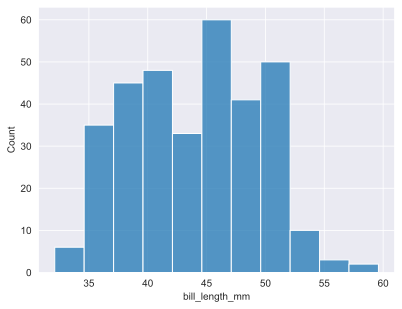

In [16]:
sns.histplot(x='bill_length_mm', data=penguins);

По оси ординат, по умолчанию, откладывается количество наблюдений. Но библиотека *seaborn* даёт возможность использовать и другие статистики, за что отвечает параметр `stat` функции `sns.histplot()`. 

Возможные значения параметра `stat`:
- `'count'`: Количество наблюдений в каждом бине (используется по умолчанию). Гистограмма показывает, сколько значений попадает в каждую корзину (бин).
- `'frequency'`: Частота наблюдений в каждом бине. Эта статистика делит количество наблюдений в каждом бине на общее количество наблюдений, показывая долю наблюдений.
- `'density'`: Указывает, что вместо количества наблюдений (то есть частоты), по оси ординат будет отображаться плотность распределения. Эта статистика нормализует гистограмму так, чтобы суммарная площадь всех баров равнялась 1. Это полезно для сравнения распределений с разным количеством данных.
- `'probability'`: Вероятность наблюдений в каждом бине. Похожа на density, но вместо плотности показывает вероятность (т.е. сумма высот всех баров равна 1).
- `'percent'`: Процент наблюдений в каждом бине. Эта статистика умножает частоту на 100, чтобы показать долю в процентах.
- `'proportion'`: Каждый бин гистограммы показывает долю данных, которые попадают в этот бин относительно общего числа данных. То есть, сумма всех высот бинов будет равна 1.
 
Давайте, для наглядности, построим графики со всеми вариантами параметра `stat`:

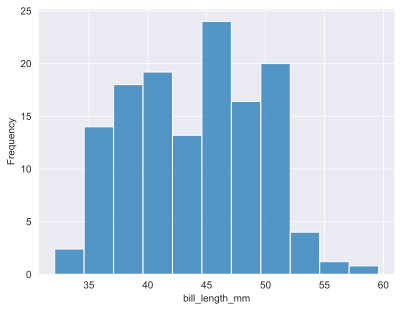

In [17]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='frequency');

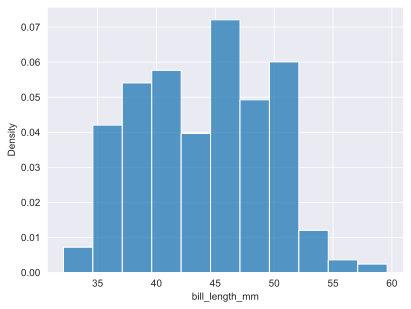

In [18]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='density');

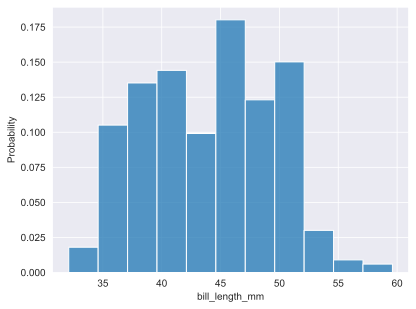

In [19]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='probability');

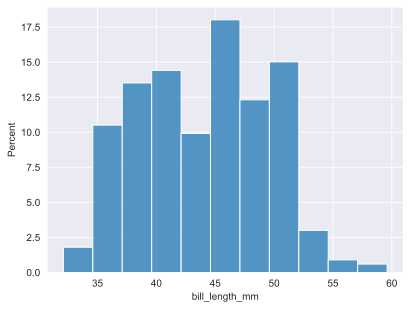

In [20]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='percent');

Использование параметра stat позволяет гибко настраивать гистограммы под разные задачи анализа данных и их визуализации.

**Параметр element**

Параметр` elemen`t функции` sns.histplot(`) определяет стиль отображения бинов в гистограмме. Он позволяет выбрать между несколькими способами визуализации, чтобы лучше подчеркнуть различные аспекты распределения данных.

Возможные значения парамет`ра elem`en- `:

'`bars' (по умолчанию): Отображает бины в виде столбцов (баров). Это традиционный вид гистограммы, где высота каждого столбца соответствует количеству наблюдений или другой выбранной метр- `ике.
`'step': Отображает гистограмму в виде ступенчатого графика. В этом режиме высоты бинов соединяются прямыми линиями, создавая вид ступ- `енек.`
'poly': Отображает гистограмму в виде линейного графика. В этом режиме вершины каждого бина соединяются прямыми линиями, создавая замкнутую линию, напоминающую линейный 
- график.
Например, построим гистограмму с параметром element='poly':

**Параметр element**

Параметр `element` функции `sns.histplot()` определяет стиль отображения бинов в гистограмме. Он позволяет выбрать между несколькими способами визуализации, чтобы лучше подчеркнуть различные аспекты распределения данных.

Возможные значения параметра `element`:
- `'bars'` (по умолчанию): Отображает бины в виде столбцов (баров). Это традиционный вид гистограммы, где высота каждого столбца соответствует количеству наблюдений или другой выбранной метрике.
- `'step'`: Отображает гистограмму в виде ступенчатого графика. В этом режиме высоты бинов соединяются прямыми линиями, создавая вид ступенек.
- `'poly'`: Отображает гистограмму в виде линейного графика. В этом режиме вершины каждого бина соединяются прямыми линиями, создавая замкнутую линию, напоминающую линейный график.

Например, построим гистограмму с параметром element='poly':

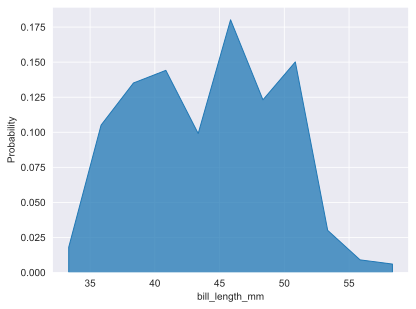

In [21]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='probability',
             element='poly');

А также посмотрим на ступенчатое отображение гистограммы. В этом случае мы ещё применим параметр `fill` со значением `False`, для того, чтобы не происходило заливки нижней части графика:

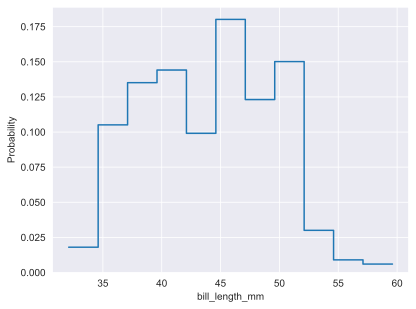

In [22]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='probability',
             fill=False,
             element='step');

И для того, чтобы график смотрелся более выразительно - увеличим толщину линии, используя параметр `linewidth`:

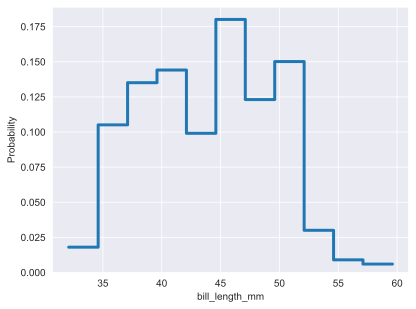

In [23]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='probability',
             fill=False,
             element='step',
             linewidth=3);

**Параметр cumulative**

Говоря про ступенчатое отображение гистограммы, рассмотрим сразу и параметр `cumulative` функции `sns.histplot()`, который позволяет создавать гистограмму с накопительным (кумулятивным) эффектом.

Накопительная гистограмма показывает сумму наблюдений в каждом бине, добавляя значения каждого последующего бина к предыдущему. Это позволяет визуализировать накопленное количество или долю данных до каждой точки.

Для включения накопительного эффекта, параметру `cumulative` передаётся значение `True`:

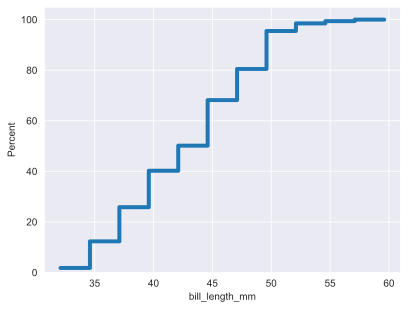

In [24]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='percent',
             fill=False,
             element='step',
             linewidth=4,
             cumulative=True);

Например, добавим при помощи библиотеки `matplotlib` горизонтальную линию на отметке 80:

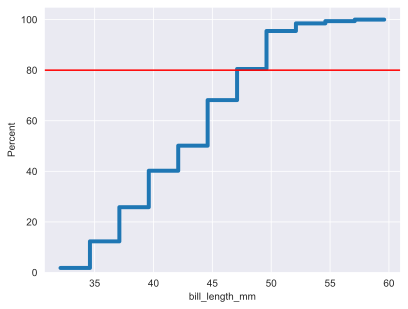

In [25]:
sns.histplot(x='bill_length_mm', data=penguins,
             stat='percent',
             fill=False,
             element='step',
             linewidth=4,
             cumulative=True)

plt.axhline(80, color='red');

И теперь наглядно видим, что примерно 80 процентов особей имеют длину клювика менее 50 мм.

**Параметр hue**

Следующий параметр функции `sns.histplot()`, который мы рассмотрим, - это параметр `hue`. Он применяется для разделения данных на подгруппы и визуализации этих подгрупп в разных цветах. Это позволяет легко сравнивать распределения различных категорий на одном графике.

Параметр `hue` принимает имя столбца из DataFrame или массив, который содержит категории для данных. Значения в этом столбце или массиве будут определять, к какой подгруппе относится каждая точка данных. Каждая подгруппа будет отображаться своим цветом, что делает график более информативным и наглядным.

Для примера построим гистограмму распределения длины клюва с разбивкой по видам пингвинов:

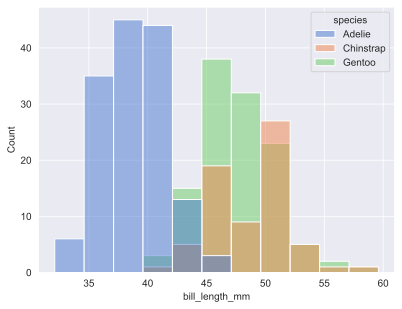

In [27]:
sns.histplot(x='bill_length_mm', data=penguins,
             palette='muted',
             hue='species');

Как видим, по умолчанию, данные накладываются друг на друга. Улучшить читаемость диаграммы можно, применив параметр `element` со значением `'step'`:

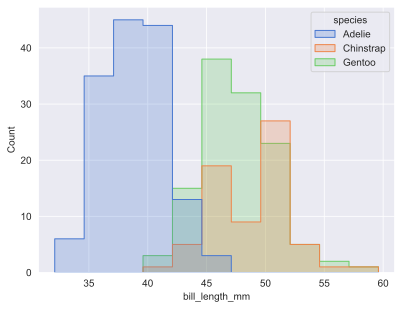

In [28]:
sns.histplot(x='bill_length_mm', data=penguins,
             palette='muted',
             hue='species',
             element='step');

Или со значением `'poly'`:

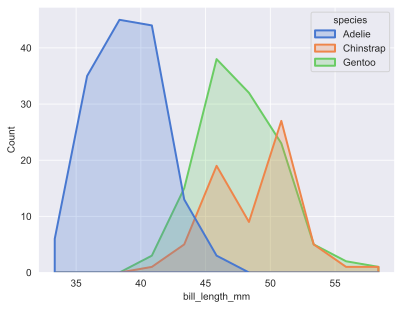

In [29]:
sns.histplot(x='bill_length_mm', data=penguins,
             palette='muted',
             hue='species',
             element='poly',
             linewidth=2);

Эти манипуляции улучшают читаемость графика, но если категорий будет много, то это не поможет. Поэтому для улучшения читаемости диаграммы предусмотрен параметр `multiple`.

**Параметр multiple**

Параметр `multiple` определяет, как будут отображаться подгруппы, указанные с помощью параметра `hue`. Этот параметр позволяет вам контролировать, как именно различные категории данных будут визуализироваться на одном графике.

Параметр `multiple` имеет несколько возможных значений:
- `'layer'` - подгруппы накладываются друг на друга полупрозрачными слоями (по умолчанию);
- `'dodge'` - размещает подгруппы бок о бок;
- `'stack'` - подгруппы складываются друг на друга, создавая суммарную высоту;
- `'fill'` - нормализует высоты так, чтобы они суммировались до 1.

Построим нашу диаграмму с параметром `multiple='stack'`:

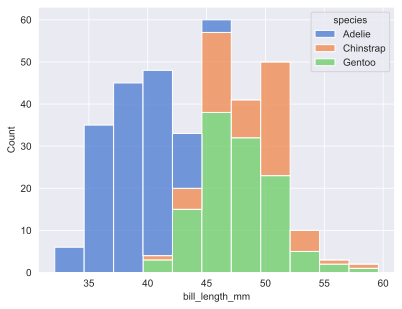

In [30]:
sns.histplot(x='bill_length_mm', data=penguins,
             palette='muted',
             hue='species',
             multiple='stack');

Можно подметить, что информативность диаграммы сразу увеличилась.

Применение параметра `multiple` со значением `'stack'` подходит для визуализации общего количества наблюдений в каждом бине, когда важна суммарная высота.

Теперь посмотрим на диаграмму с параметром `multiple='fill'`:

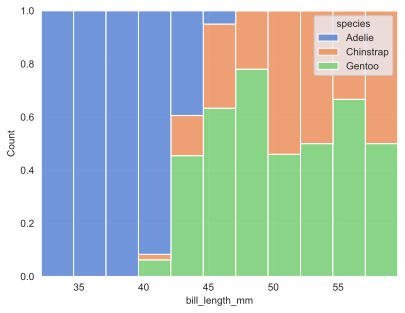

In [31]:
sns.histplot(x='bill_length_mm', data=penguins,
             palette='muted',
             hue='species',
             multiple='fill');

При таком варианте построения гистограммы, подгруппы заполняют общую высоту, нормированную так, чтобы сумма пропорций равнялась 1. Это полезно для сравнения относительных пропорций в каждом бине, особенно когда важно видеть распределение категорий в процентах.

При следующем варианте построения гистограммы `'dodge'`,  подгруппы располагаются рядом друг с другом. Например:

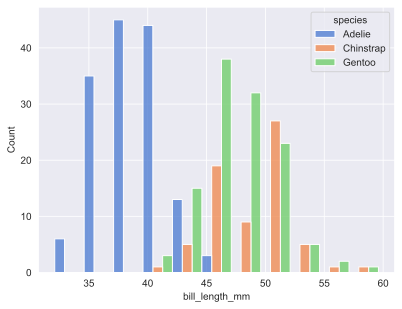

In [32]:
sns.histplot(x='bill_length_mm', data=penguins,
             palette='muted',
             hue='species',
             multiple='dodge');

Такой вариант построения гистограммы используется для четкого разделения подгрупп, когда необходимо сравнивать подгруппы бок о бок.

В целом, параметр `multiple` делает гистограммы более гибкими и наглядными для анализа данных, позволяя лучше понять распределение различных категорий.

**Параметр shrink**

Параметр `shrink` функции `sns.histplot()` позволяет уменьшить ширину бинов, создавая промежутки между ними. Он принимает значения от 0 до 1, где 1 означает полную ширину бина, а меньшие значения уменьшают ширину пропорционально.

В предыдущем примере, при использовании параметра `multiple='dodge'`, уменьшение ширины столбцов может улучшить визуальное разделение между категориями:

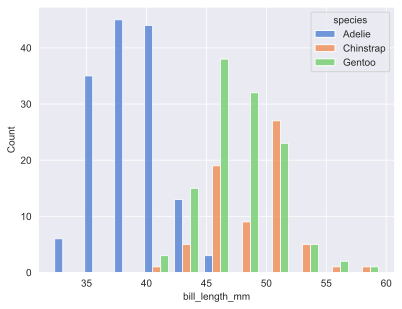

In [33]:
sns.histplot(x='bill_length_mm', data=penguins,
             palette='muted',
             hue='species',
             multiple='dodge',
             shrink=0.8);

Или рассмотрим другой пример. Построим распределение пингвинов по виду и полу:

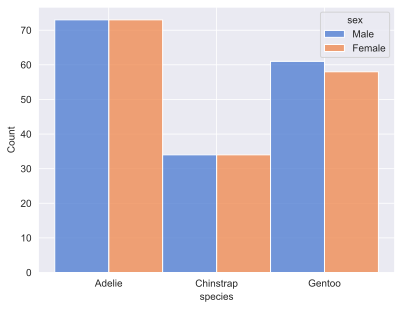

In [34]:
sns.histplot(x='species', data=penguins,
             palette='muted',
             hue='sex',
             multiple='dodge');

Этот график выглядит как будто бы перегруженным. Параметром `'shrink'` уменьшим ширину столбцов:

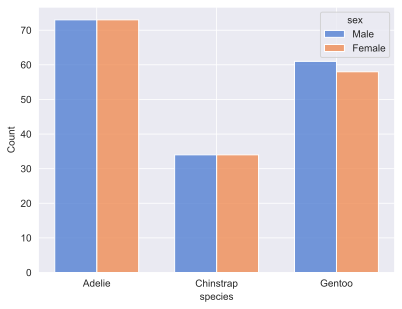

In [35]:
sns.histplot(x='species', data=penguins,
             palette='muted',
             hue='sex',
             multiple='dodge',
             shrink=0.7);

Теперь график выглядит более "воздушным".

Рассмотрим еще один вариант применения функции `sns.histplot()`. Построим диаграмму, где по оси абсцисс мы отложим длину клюва, а по оси ординат - глубину клюва:

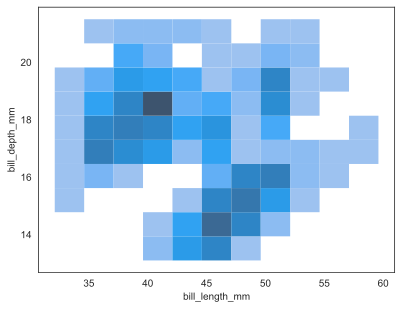

In [36]:
sns.set_style('white')

sns.histplot(x='bill_length_mm',
             y='bill_depth_mm',
             data=penguins);

И в данном случае, мы получаем аналог тепловой карты. Добавим также шкалу, применив параметр `cbar` со значением `True`:

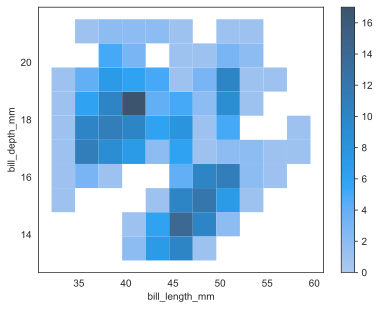

In [37]:
sns.histplot(x='bill_length_mm',
             y='bill_depth_mm',
             data=penguins,
             cbar=True);

Из этой диаграммы мы можем увидеть, что наибольшее количество пингвинов имеют длину клюва около 40 мм и глубину около 18 мм.

Если добавим на эту диаграмму ещё и разделение по видам:

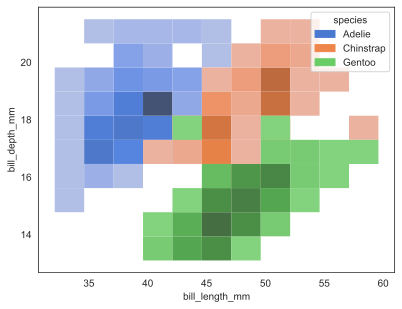

In [38]:
sns.histplot(x='bill_length_mm',
             y='bill_depth_mm',
             data=penguins,
             palette='muted',
             hue='species');

Теперь мы можем визуально выделить диапазоны значений, в которых находится наибольшее количество пингвинов каждого вида.

Теперь давайте попробуем по оси ординат отложить категориальные значения, а именно, вид пингвинов:

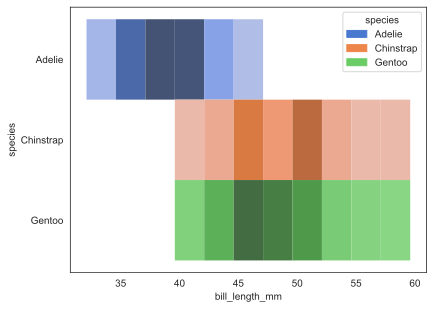

In [39]:
sns.histplot(x='bill_length_mm',
             y='species',
             data=penguins,
             palette='muted',
             hue='species');

Как видим, такой вариант тоже работает и вполне можно использовать при анализе данных.